<a href="https://colab.research.google.com/github/Giocatory/ml_ai_learning/blob/main/%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_Lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [1]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

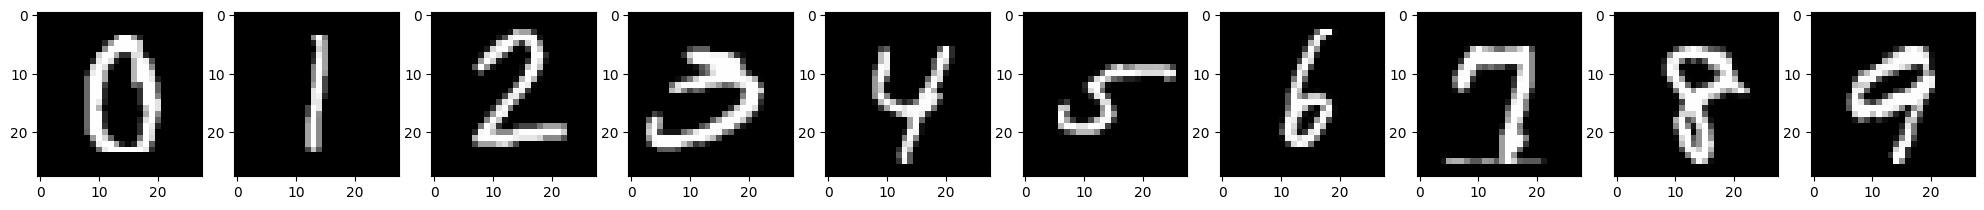

In [3]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

In [4]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [5]:
# Ваше решение
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Convolution2D
from tensorflow.keras.optimizers import Adam

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# Параметры модели: сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(6, (2, 2), strides=(2, 2), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 6)         774       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 6)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 294)               0         
                                                                 
 dense (Dense)               (None, 128)               37760     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                         

In [8]:
# Гиперпараметры обучения: функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 12s 6ms/step - loss: 0.2888 - accuracy: 0.9127
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1013 - accuracy: 0.9687
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0743 - accuracy: 0.9776
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0577 - accuracy: 0.9824
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0443 - accuracy: 0.9864
Epoch 7/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0401 - accuracy: 0.9873
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0361 - accuracy: 0.9883
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 10/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0314 - accuracy: 0.989

In [9]:
# В конце выведите график обучения: доли верных ответов на обучающей и проверочной выборках.

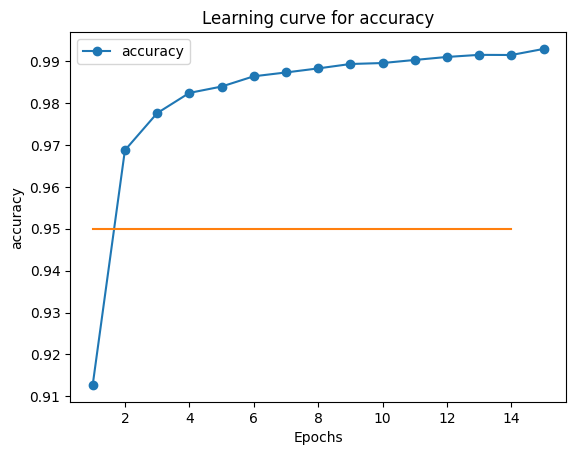

In [10]:
plt.figure()
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'o-', label='accuracy')
plt.plot([1, 14], [0.95, 0.95])
plt.title('Learning curve for '+'accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plot_learning_curve(history, 'accuracy')
plt.show()